## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from scipy.stats import zscore


## Loading the Dataset

In [2]:
# load dataset from csv file
df = pd.read_csv('./../wells/Anderson_East_2-35 Run Data.csv')

## Analyzing the Dataset

In [3]:
df

,Run Number,Well,Time - DROP,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),Time - ARRIVING,CP - ARRIVING (psi),...,Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas,Liquid
0,1669,Anderson_East_2-35,2/5/2025 23:08,271,62,50.76,209,2.67,2/5/2025 22:54,275,...,228.44,1.43,9.066667,497.316176,1,0,13.550000,0.850000,0.14,NaN
1,1668,Anderson_East_2-35,2/5/2025 22:53,273,61,50.05,212,2.70,2/5/2025 22:40,276,...,223.93,1.40,8.250000,546.545455,1,0,13.750000,0.850000,0.12,NaN
2,1667,Anderson_East_2-35,2/5/2025 22:39,275,65,54.55,210,2.68,2/5/2025 22:25,276,...,222.89,1.40,8.100000,556.666667,1,0,13.716667,0.800000,0.14,NaN
3,1666,Anderson_East_2-35,2/5/2025 22:24,275,67,56.24,208,2.65,2/5/2025 22:11,274,...,220.80,1.38,8.133333,554.385246,1,0,13.300000,0.850000,0.13,NaN
4,1665,Anderson_East_2-35,2/5/2025 22:10,273,67,56.25,206,2.63,2/5/2025 21:57,277,...,224.33,1.34,7.966667,565.983264,1,0,13.233333,0.766667,0.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,5,Anderson_East_2-35,1/10/2025 15:42,293,222,213.66,71,0.91,1/10/2025 15:38,300,...,85.70,1.45,0.266667,16908.750000,1,0,4.166667,0.883333,0.00,NaN
1665,4,Anderson_East_2-35,1/10/2025 15:37,299,223,215.22,76,0.97,1/10/2025 15:27,296,...,79.75,1.56,9.033333,499.151292,1,0,10.083333,0.783333,0.00,NaN
1666,3,Anderson_East_2-35,1/10/2025 15:26,296,226,217.86,70,0.89,1/10/2025 15:25,296,...,79.30,1.50,0.266667,16908.750000,1,0,1.666667,0.783333,0.00,NaN
1667,2,Anderson_East_2-35,1/10/2025 15:24,294,227,219.75,67,0.85,1/10/2025 15:14,297,...,76.20,1.47,8.466667,532.559055,1,0,9.416667,0.883333,0.00,NaN


In [4]:
# removing negative values from gas production

df['Gas'] = df['Gas'].clip(lower=0)


In [5]:
df.describe()

,Run Number,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),CP - ARRIVING (psi),TP - ARRIVING (psi),LP - ARRIVING (psi),Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas,Liquid
count,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,0.0
mean,835.000000,287.444578,94.483523,83.541216,192.961055,2.461744,288.486519,141.820851,80.665392,207.821132,1.818922,9.285191,1286.957572,0.944877,0.055123,19.229239,3.489305,0.122666,NaN
std,481.943116,22.467511,45.289667,46.907007,47.048463,0.600342,21.934185,47.159301,46.853570,48.023197,3.312858,8.366285,3407.361456,0.228288,0.228288,119.857887,66.099724,0.049545,NaN
min,1.000000,264.000000,7.000000,0.020000,44.000000,0.560000,265.000000,7.000000,0.020000,55.190000,0.880000,0.166667,64.862143,0.000000,0.000000,0.983333,0.750000,0.000000,NaN
25%,418.000000,277.000000,70.000000,57.200000,197.000000,2.510000,279.000000,116.000000,54.280000,211.930000,1.340000,6.666667,518.275862,1.000000,0.000000,11.916667,0.800000,0.120000,NaN
50%,835.000000,281.000000,75.000000,63.740000,206.000000,2.630000,282.000000,124.000000,60.930000,222.340000,1.390000,7.866667,573.177966,1.000000,0.000000,12.966667,0.850000,0.130000,NaN
75%,1252.000000,287.000000,87.000000,76.230000,213.000000,2.720000,288.000000,139.000000,73.960000,228.910000,1.470000,8.700000,676.350000,1.000000,0.000000,14.283333,0.866667,0.150000,NaN
max,1669.000000,466.000000,280.000000,272.890000,459.000000,5.860000,467.000000,340.000000,273.210000,427.810000,54.110000,69.516667,27054.000000,1.000000,1.000000,4805.400000,2695.433333,0.970000,NaN


## Preprocessing the Dataset

### Cleaning & Removing Outliers from the Dataset

In [6]:
df_z = pd.read_csv('./../wells/Pickle_2-9-4-33H-2 Run Data.csv')

# shift CP-DROP, TP-DROP, LP-DROP by -1
df_z['CP - DROP (psi)'] = df_z['CP - DROP (psi)'].shift(-1)
df_z['TP - DROP (psi)'] = df_z['TP - DROP (psi)'].shift(-1)
df_z['LP - DROP (psi)'] = df_z['LP - DROP (psi)'].shift(-1)
df_z['Liquid Load - DROP (psi)'] = df_z['Liquid Load - DROP (psi)'].shift(-1)
df_z['Fluid in Tubing - DROP (bbl)'] = df_z['Fluid in Tubing - DROP (bbl)'].shift(-1)

# drop column liquid load
df_z = df_z.drop(columns=['Liquid'])
df_z = df_z.dropna()

In [7]:
df_z.head(10)

,Run Number,Well,Time - DROP,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),Time - ARRIVING,CP - ARRIVING (psi),...,LP - ARRIVING (psi),Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas
0,1477,Pickle_1-8-5-32H-2,2/5/2025 23:46,170.25,76.42,67.07,93.84,1.20,2/5/2025 23:26,173.02,...,74.05,98.97,4.37,10.283333,397.925446,1,0,19.416667,1.133333,0.06
1,1476,Pickle_1-8-5-32H-2,2/5/2025 23:25,173.83,43.00,38.85,130.82,1.67,2/5/2025 22:56,175.47,...,40.12,135.34,1.39,14.350000,285.156794,1,0,29.333333,1.133333,0.09
2,1475,Pickle_1-8-5-32H-2,2/5/2025 22:55,168.70,86.10,82.50,82.59,1.05,2/5/2025 22:39,172.47,...,71.50,100.97,1.35,11.950000,342.426778,1,0,15.783333,1.116667,0.06
3,1474,Pickle_1-8-5-32H-2,2/5/2025 22:38,157.98,36.98,34.31,121.00,1.54,2/5/2025 21:44,166.02,...,27.10,138.92,1.14,49.966667,81.894596,1,0,53.750000,1.100000,0.16
4,1473,Pickle_1-8-5-32H-2,2/5/2025 21:43,153.02,62.49,59.37,90.53,1.15,2/5/2025 21:00,156.42,...,49.39,107.03,1.40,38.616667,105.964609,1,0,42.516667,1.150000,0.13
5,1472,Pickle_1-8-5-32H-2,2/5/2025 20:59,159.27,45.11,34.04,114.17,1.46,2/5/2025 20:42,160.60,...,31.27,129.33,2.73,15.016667,272.497225,1,0,17.416667,1.116667,0.14
6,1471,Pickle_1-8-5-32H-2,2/5/2025 20:41,162.44,71.29,65.59,91.16,1.16,2/5/2025 20:01,169.10,...,68.24,100.86,1.57,13.916667,294.035928,1,0,39.866667,1.150000,0.15
7,1470,Pickle_1-8-5-32H-2,2/5/2025 20:00,165.56,54.13,48.95,111.43,1.42,2/5/2025 19:46,166.74,...,44.77,121.96,1.97,11.016667,371.437216,1,0,13.900000,1.133333,0.06
8,1469,Pickle_1-8-5-32H-2,2/5/2025 19:45,159.53,74.89,70.90,84.64,1.08,2/5/2025 19:23,167.00,...,72.61,94.39,1.13,19.016667,215.179667,1,0,21.600000,1.116667,0.14
9,1468,Pickle_1-8-5-32H-2,2/5/2025 19:22,159.62,43.12,39.93,116.50,1.49,2/5/2025 18:55,162.88,...,32.92,129.96,1.32,23.450000,174.498934,1,0,26.816667,1.116667,0.00


In [8]:
# Load dataset
# df_z = pd.read_csv('./../wells/Anderson_East_2-35 Run Data.csv')

# df_z = df_z.drop(columns=['Liquid'])
all_columns = df_z.columns
# df_z['Gas'] = df_z['Gas'].clip(lower=0)

# features to retain
retain_columns = ['Time - DROP', 'Time - ARRIVING', 'Run Number', "Well"]

# Identify numerical features (excluding retained ones)
numeric_columns = df_z.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in retain_columns]

# Compute Z-scores for numerical columns
z_scores = df_z[numeric_columns].apply(zscore)

# Define outlier mask (threshold |Z| > 3)
outlier_mask = (z_scores.abs() > 3)
outlier_rows = outlier_mask.any(axis=1)

# mask for gas production being zero
gas_zero_mask = (df_z['Gas'] == 0)

# Replace outlier rows' non-retained columns with NaN
df_z.loc[outlier_rows, numeric_columns] = np.nan

# Replacing all features except 'Time - Drop' and 'Time - Arriving' with NaN when 'Gas' is zero
df_z.loc[gas_zero_mask, [col for col in all_columns if col not in retain_columns]] = np.nan

# Save the cleaned dataset
df_z.to_csv('cleaned_well_data_Z.csv', index=False)

In [9]:
df_z.describe()

,Run Number,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),CP - ARRIVING (psi),TP - ARRIVING (psi),LP - ARRIVING (psi),Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas
count,1476.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.00000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.0,1121.0,1121.000000,1121.000000,1121.000000
mean,739.500000,161.002070,52.924103,48.304103,108.077886,1.378760,164.515245,87.26388,44.866601,119.648680,1.696896,15.654951,319.020288,1.0,0.0,23.477773,1.134211,0.106905
std,426.228812,5.201098,17.096053,17.078448,16.771961,0.214061,4.991743,24.07375,17.508809,16.605716,0.597454,7.331696,174.941871,0.0,0.0,10.517522,0.028599,0.044521
min,2.000000,147.520000,24.460000,20.180000,51.930000,0.660000,148.990000,29.91000,16.440000,67.470000,1.060000,2.333333,92.614108,1.0,0.0,5.183333,0.933333,0.010000
25%,370.750000,157.370000,38.650000,33.990000,96.980000,1.240000,161.380000,69.21000,30.270000,108.500000,1.310000,11.016667,227.755102,1.0,0.0,16.200000,1.116667,0.070000
50%,739.500000,161.060000,49.430000,44.530000,111.110000,1.420000,164.630000,86.10000,40.120000,123.560000,1.520000,13.633333,300.146699,1.0,0.0,19.800000,1.133333,0.100000
75%,1108.250000,164.460000,64.480000,59.710000,121.830000,1.550000,167.660000,103.35000,56.670000,132.330000,1.870000,17.966667,371.437216,1.0,0.0,27.850000,1.150000,0.140000
max,1477.000000,178.580000,109.170000,106.050000,140.310000,1.790000,180.140000,152.42000,104.200000,149.580000,6.880000,44.183333,1753.714286,1.0,0.0,61.416667,1.666667,0.280000


## Feature Engineering

In [10]:
# Deriving Gas Rate
df_z['GasRate'] = df_z['Gas'] / df_z['Open Duration (m)']

# Deriving Fluid Rate
df_z['Fluidrate (bbl/m)'] = df_z['Fluid in Tubing - DROP (bbl)'] / df_z['Open Duration (m)']

# df_z = df_z.dropna()

# Deriving change in Lift Pressure Rate
df_z['Lift Pressure - DROP (psi)'] = df_z['CP - DROP (psi)'] - df_z['LP - DROP (psi)']

df_z['UpwardRate (psi/m)'] = (df_z['Lift Pressure - ARRIVING (psi)'] - df_z['Lift Pressure - DROP (psi)'])/ df_z['Close Duration (m)']

df_z.to_csv('cleaned_well_data_Z.csv', index=False)

In [11]:
df_z['UpwardRate (psi/m)'] 

0       -3.714706
1        0.317647
2       13.226866
3             NaN
4       11.634783
          ...    
1471          NaN
1472          NaN
1473          NaN
1474          NaN
1475          NaN
Name: UpwardRate (psi/m), Length: 1476, dtype: float64

In [12]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Rise Time (m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='blue', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Gas Rate vs Rise Time',
    xaxis_title='Rise Time (m)',
    yaxis_title='Gas Rate',
    # xaxis_range=[60, 4000],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [13]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Rise Velocity (fpm)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='red', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Gas Rate vs Rise Velocity',
    xaxis_title='Rise Velocity (fpm)',
    yaxis_title='Gas Rate',
    xaxis_range=[60, 4000],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [14]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Open Duration (m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='green', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Gas Rate vs Open Duration',
    xaxis_title='Open Duration (m)',
    yaxis_title='Gas',
    xaxis_range=[0, 80],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [15]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=df_z['Rise Velocity (fpm)'],  
    y=df_z['Rise Time (m)'],  
    mode='markers',  
    marker=dict(size=6, color='red', opacity=0.7),  
    name='Rise Time vs Velocity'
))

# Customize layout
fig.update_layout(
    title='Inverse Relationship: Rise Time vs Rise Velocity',
    xaxis_title='Rise Velocity (fpm)',
    yaxis_title='Rise Time (m)',
    template='plotly_white'
)

# Show plot
fig.show()


In [16]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Liquid Load - DROP (psi)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='blue', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Liquid Load vs Gas Rate',
    xaxis_title='Liquid Load (psi)',
    yaxis_title='Gas Rate',
    xaxis_range=[100, 240],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [17]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Fluidrate (bbl/m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='green', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Fluid in Tubing Rate vs Gas Rate',
    xaxis_title='Fluid in Tubing Rate (bbl/m)',
    yaxis_title='Gas Rate',
    xaxis_range=[0, 0.6],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [18]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['UpwardRate (psi/m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='red', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Upward Rate vs Gas Rate',
    xaxis_title='Upward Rate (psi/m)',
    yaxis_title='Gas Rate',
    # xaxis_range=[0, 50],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [19]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Lift Pressure - DROP (psi)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='blue', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Lift Pressure (DROP) of Previous Run vs Gas Rate',
    xaxis_title='Lift Pressure (psi)',
    yaxis_title='Gas Rate',
    # xaxis_range=[0, 50],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


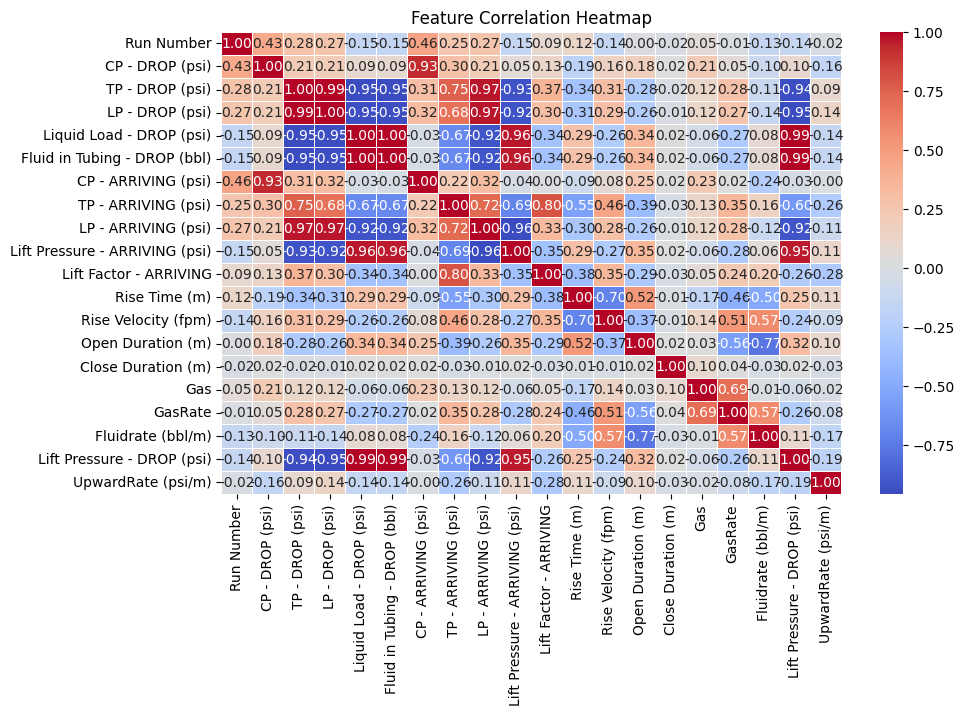

In [20]:
# drop column form df
df_z = df_z.drop(columns=['Good', 'Miss'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_z.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


# Selecting Best Cycles

In [21]:
df_z.describe()

,Run Number,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),CP - ARRIVING (psi),TP - ARRIVING (psi),LP - ARRIVING (psi),Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Open Duration (m),Close Duration (m),Gas,GasRate,Fluidrate (bbl/m),Lift Pressure - DROP (psi),UpwardRate (psi/m)
count,1476.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.00000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,739.500000,161.002070,52.924103,48.304103,108.077886,1.378760,164.515245,87.26388,44.866601,119.648680,1.696896,15.654951,319.020288,23.477773,1.134211,0.106905,0.005397,0.067807,112.697966,6.131650
std,426.228812,5.201098,17.096053,17.078448,16.771961,0.214061,4.991743,24.07375,17.508809,16.605716,0.597454,7.331696,174.941871,10.517522,0.028599,0.044521,0.003390,0.026244,16.801596,4.447958
min,2.000000,147.520000,24.460000,20.180000,51.930000,0.660000,148.990000,29.91000,16.440000,67.470000,1.060000,2.333333,92.614108,5.183333,0.933333,0.010000,0.000215,0.019541,55.130000,-5.726471
25%,370.750000,157.370000,38.650000,33.990000,96.980000,1.240000,161.380000,69.21000,30.270000,108.500000,1.310000,11.016667,227.755102,16.200000,1.116667,0.070000,0.003053,0.049100,101.960000,3.397059
50%,739.500000,161.060000,49.430000,44.530000,111.110000,1.420000,164.630000,86.10000,40.120000,123.560000,1.520000,13.633333,300.146699,19.800000,1.133333,0.100000,0.004743,0.066301,115.610000,5.814706
75%,1108.250000,164.460000,64.480000,59.710000,121.830000,1.550000,167.660000,103.35000,56.670000,132.330000,1.870000,17.966667,371.437216,27.850000,1.150000,0.140000,0.006986,0.083146,126.360000,8.832353
max,1477.000000,178.580000,109.170000,106.050000,140.310000,1.790000,180.140000,152.42000,104.200000,149.580000,6.880000,44.183333,1753.714286,61.416667,1.666667,0.280000,0.034848,0.284034,144.110000,20.514706


In [22]:
# Create a copy of the dataframe to avoid modifying the original data
best_cycles = df_z.copy()

# Define thresholds (75th percentile for gas rate)
gas_rate_threshold = best_cycles['GasRate'].quantile(0.75)

# Identify runs where both conditions are met
good_runs = best_cycles[(best_cycles['GasRate'] >= gas_rate_threshold)]

# Find indices of qualifying runs
good_indices = good_runs.index

# Include the next run after each selected run
selected_indices = set(good_indices) | set(good_indices + 1)

# Ensure indices are within dataset bounds
selected_indices = [idx for idx in selected_indices if idx < len(best_cycles)]

# Convert to list for iteration
selected_indices = sorted(selected_indices)

# Remove both current and next rows if the next row has NaN in "Gas"
final_selected_indices = []
i = 0
while i < len(selected_indices):
    idx = selected_indices[i]
    next_idx = idx + 1

    # If next row exists and has NaN in "Gas", skip both rows
    if next_idx in selected_indices and pd.isna(best_cycles.loc[next_idx, 'Gas']):
        i += 2  # Skip both current and next row
    else:
        final_selected_indices.append(idx)
        i += 1  # Move to the next index

# Filter dataset with the final selected indices
filtered_best_cycles = best_cycles.loc[final_selected_indices]

# Save the filtered runs
filtered_best_cycles.to_csv('best_cycles.csv', index=False)